# Credit Card Default Analysis 

In [ ]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, roc_curve, plot_roc_curve, plot_confusion_matrix, classification_report, confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier



from sklearn.svm import SVC
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler 


import warnings
warnings.filterwarnings('ignore')

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import ADASYN

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

from sklearn import metrics  
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve


In [ ]:
from imblearn.over_sampling import ADASYN

In [ ]:
df = pd.read_csv("UCI_Credit_Card.csv")
df.shape

(30000, 25)

##  Understanding the Data

In [ ]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [ ]:
pay = df[['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']]
pay_melt = pd.melt(pay)
print(pay_melt['value'].value_counts())

 0    95919
-1    34640
-2    24415
 2    18964
 1     3722
 3     1430
 4      453
 7      218
 5      137
 6       74
 8       28
Name: value, dtype: int64


In [ ]:
df['default.payment.next.month'].value_counts(normalize=True)

0    0.7788
1    0.2212
Name: default.payment.next.month, dtype: float64

In [ ]:
df['default.payment.next.month'].value_counts()

0    23364
1     6636
Name: default.payment.next.month, dtype: int64

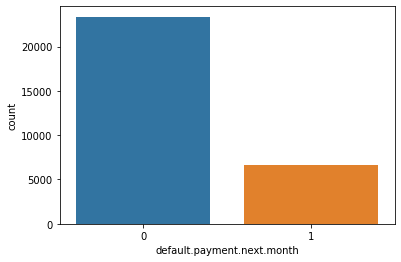

In [ ]:
sns.countplot(x = df['default.payment.next.month'])

## About 22% customers had default payment next month

##  Data Cleanning

### (1) Check missing values, column type and column names

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

### Change inconsistent column names "PAY_0" to 'PAY_1', 'default.payment.next.month'to 'DEF_PAY_NMO'

In [ ]:
df.rename(columns={'PAY_0':'PAY_1','default.payment.next.month':'DEF_PAY_NMO'},inplace = True)
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'DEF_PAY_NMO'],
      dtype='object')

### Check duplicate records

In [ ]:
df.duplicated(subset = 'ID').any()

False

 so no duplicates

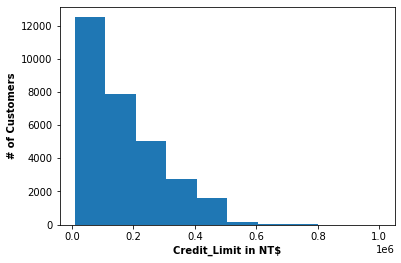

In [ ]:
# Use histogram to view the distribution of credit limit

plt.hist(df["LIMIT_BAL"])
plt.xlabel('Credit_Limit in NT$', fontweight='bold')
plt.ylabel('# of Customers', fontweight='bold')
plt.show()

In [ ]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEF_PAY_NMO
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


No data is extremly unresonable in these columns

In [ ]:
#Save processed csv file for part 2 - modeling
df.to_csv("UCI_Credit_Card_Processed.csv", index=None)

### Check categorical columns ('SEX',	'EDUCATION' and	'MARRIAGE')

In [ ]:
df["SEX"].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

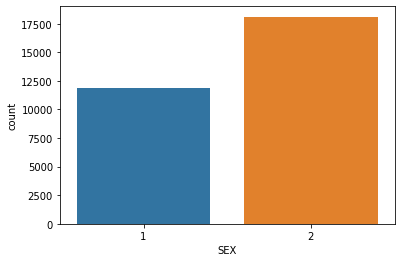

In [ ]:
sns.countplot(x = 'SEX' ,data = df)

SEX column's distribution. 1: male; 2: female
No undocumented 'SEX' code

In [ ]:
df["SEX"].value_counts(normalize=True)

2    0.603733
1    0.396267
Name: SEX, dtype: float64

In [ ]:
df["EDUCATION"].unique()

array([2, 1, 3, 5, 4, 6, 0])

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

In [ ]:
df["EDUCATION"].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

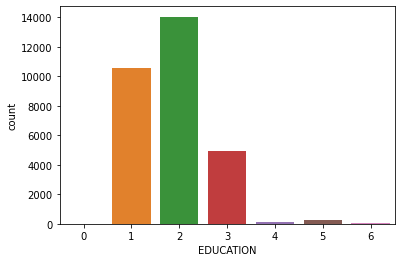

In [ ]:
sns.countplot(x = 'EDUCATION' ,data = df)

In [ ]:
df["EDUCATION"] = df["EDUCATION"].replace({5:4,0:4,6:0})

In [ ]:
df["EDUCATION"].value_counts(normalize=True)

2    0.467667
1    0.352833
3    0.163900
4    0.015600
Name: EDUCATION, dtype: float64

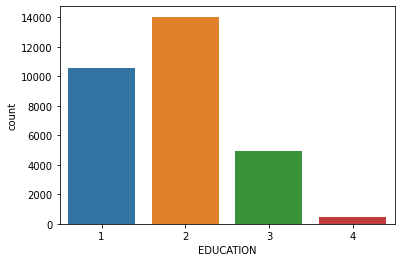

In [ ]:
sns.countplot(x = 'EDUCATION',data = df)

 
 0 = others , 1 = graduate school,  2 = university,  3 = high school,

In [ ]:
df["MARRIAGE"].unique()

array([1, 2, 3, 0])

In [ ]:
df["MARRIAGE"].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

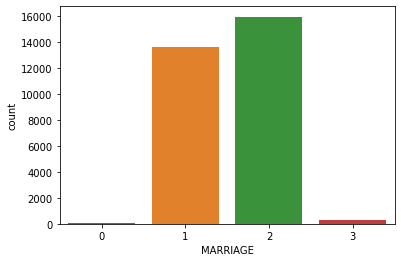

In [ ]:
sns.countplot(x = 'MARRIAGE' ,data = df)

From dataset description: MARRIAGE: Marital status (1=married, 2=single, 3=others)

In [ ]:
df["MARRIAGE"].value_counts(normalize=True)

2    0.532133
1    0.455300
3    0.010767
0    0.001800
Name: MARRIAGE, dtype: float64

In [ ]:
df["MARRIAGE"] = df["MARRIAGE"].replace({0:3})
df["MARRIAGE"].value_counts(normalize=True)

2    0.532133
1    0.455300
3    0.012567
Name: MARRIAGE, dtype: float64

0

In [ ]:
df['DEF_PAY_NMO'].value_counts()

0    23364
1     6636
Name: DEF_PAY_NMO, dtype: int64

In [ ]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEF_PAY_NMO
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
df.set_index('ID', inplace = True)

In [ ]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEF_PAY_NMO
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


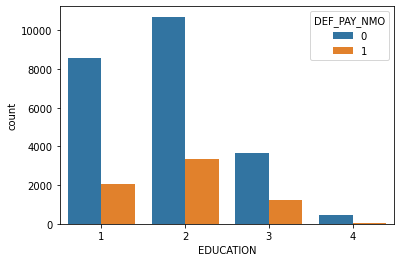

In [ ]:
#Education
sns.countplot(x='EDUCATION', hue='DEF_PAY_NMO', data=df)
# show plot

plt.show()

In [ ]:
pd.crosstab(index=df['DEF_PAY_NMO'],columns = df['EDUCATION'], normalize = 'columns')

EDUCATION,1,2,3,4
DEF_PAY_NMO,,,,
0,0.807652,0.762651,0.748424,0.929487
1,0.192348,0.237349,0.251576,0.070513


## #Although the maximum number of defauts are from University students, highest percentage of the defaults have came from high-school students

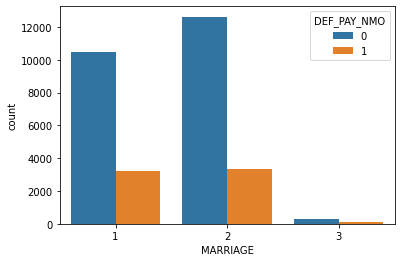

In [ ]:
#Marriage
sns.countplot(x='MARRIAGE', hue='DEF_PAY_NMO', data=df)
# show plot
plt.show()

In [ ]:
pd.crosstab(index=df['DEF_PAY_NMO'],columns = df['MARRIAGE'], normalize = 'columns')

MARRIAGE,1,2,3
DEF_PAY_NMO,,,
0,0.765283,0.790717,0.763926
1,0.234717,0.209283,0.236074


In [ ]:
pd.crosstab(index=df['DEF_PAY_NMO'],columns = df['MARRIAGE'])

MARRIAGE,1,2,3
DEF_PAY_NMO,,,
0,10453,12623,288
1,3206,3341,89


Highest number of defaults have happened in singles (Slightly higher than married)
But Married peoples percentage of default is higher than singles.
Highest percentage of default is in Others category although their number is quite low.

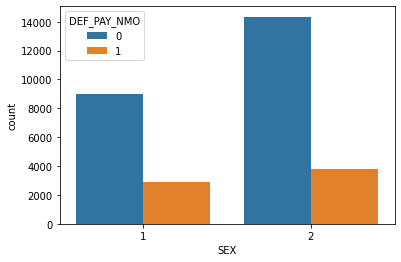

In [ ]:
#SEX
sns.countplot(x='SEX', hue='DEF_PAY_NMO', data=df)
# show plot
plt.show()

In [ ]:
pd.crosstab(index=df['DEF_PAY_NMO'],columns = df['SEX'])

SEX,1,2
DEF_PAY_NMO,,
0,9015,14349
1,2873,3763


In [ ]:
pd.crosstab(index=df['DEF_PAY_NMO'],columns = df['SEX'],normalize='columns')

SEX,1,2
DEF_PAY_NMO,,
0,0.758328,0.792237
1,0.241672,0.207763


More number of females have defaulted. However,  percentage wise, males have higher number of defaults

In [ ]:
#Numerical variables

In [ ]:
# Payment delay related variables
df[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


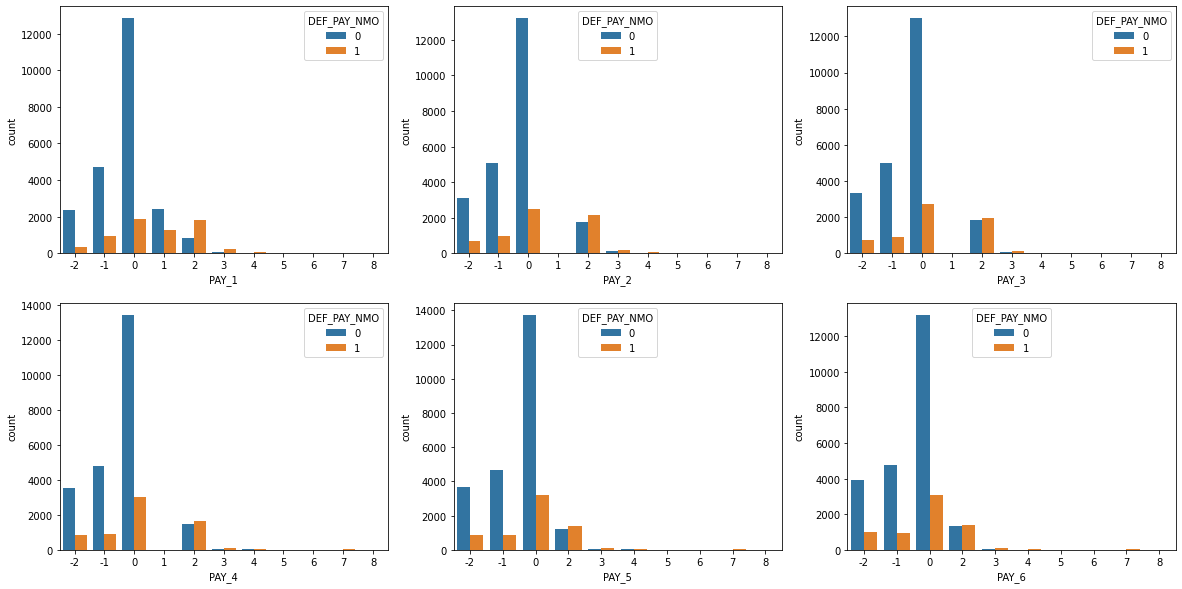

In [ ]:
#Count plot for payment delay
figure, axis = plt.subplots(2, 3, figsize=(20,10))

plt.subplot(231)
sns.countplot(x='PAY_1', hue='DEF_PAY_NMO', data=df)

plt.subplot(232)
sns.countplot(x='PAY_2', hue='DEF_PAY_NMO', data=df)

plt.subplot(233)
sns.countplot(x='PAY_3', hue='DEF_PAY_NMO', data=df)

plt.subplot(234)
sns.countplot(x='PAY_4', hue='DEF_PAY_NMO', data=df)

plt.subplot(235)
sns.countplot(x='PAY_5', hue='DEF_PAY_NMO', data=df)

plt.subplot(236)
sns.countplot(x='PAY_6', hue='DEF_PAY_NMO', data=df)
plt.show()


In [ ]:
pd.crosstab(index=df['DEF_PAY_NMO'],columns = df['PAY_1'])

PAY_1,-2,-1,0,1,2,3,4,5,6,7,8
DEF_PAY_NMO,,,,,,,,,,,
0,2394,4732,12849,2436,823,78,24,13,5,2,8
1,365,954,1888,1252,1844,244,52,13,6,7,11


In [ ]:
pd.crosstab(index=df['DEF_PAY_NMO'],columns = df['PAY_1'],normalize='columns')

PAY_1,-2,-1,0,1,2,3,4,5,6,7,8
DEF_PAY_NMO,,,,,,,,,,,
0,0.867706,0.832219,0.871887,0.660521,0.308586,0.242236,0.315789,0.5,0.454545,0.222222,0.421053
1,0.132294,0.167781,0.128113,0.339479,0.691414,0.757764,0.684211,0.5,0.545455,0.777778,0.578947


its clear that people who have delayed payment for 2 or more months have defaulted 

In [ ]:
pd.crosstab(index=df['DEF_PAY_NMO'],columns = df['PAY_2'])

PAY_2,-2,-1,0,1,2,3,4,5,6,7,8
DEF_PAY_NMO,,,,,,,,,,,
0,3091,5084,13227,23,1743,125,49,10,3,8,1
1,691,966,2503,5,2184,201,50,15,9,12,0


In [ ]:
pd.crosstab(index=df['DEF_PAY_NMO'],columns = df['PAY_2'],normalize='columns')

PAY_2,-2,-1,0,1,2,3,4,5,6,7,8
DEF_PAY_NMO,,,,,,,,,,,
0,0.817292,0.840331,0.840877,0.821429,0.44385,0.383436,0.494949,0.4,0.25,0.4,1.0
1,0.182708,0.159669,0.159123,0.178571,0.55615,0.616564,0.505051,0.6,0.75,0.6,0.0


people who have delayed payment for more than 1 month are more likely to default next month as well

In [ ]:
#Bill amount related variables
df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


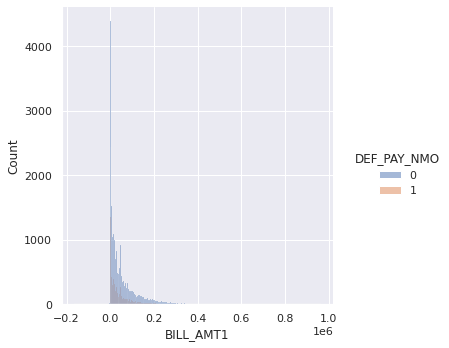

In [ ]:
#Distribution plot for bill amount
sns.displot(x='BILL_AMT1', hue='DEF_PAY_NMO', data=df)
plt.show()

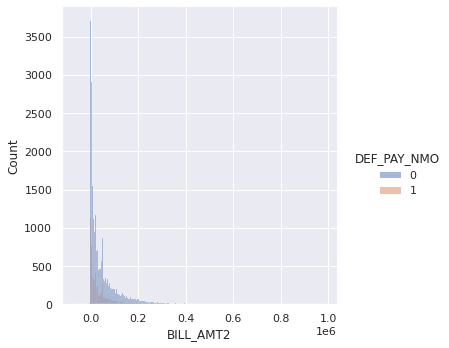

In [ ]:
sns.displot(x='BILL_AMT2', hue='DEF_PAY_NMO', data=df)
plt.show()

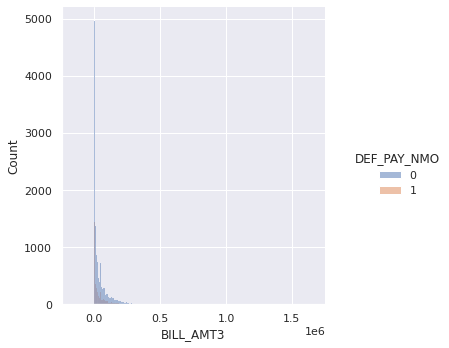

In [ ]:
sns.displot(x='BILL_AMT3', hue='DEF_PAY_NMO', data=df)
plt.show()

Going by the distribution charts for the Bill statement across different months, we can see that highest number of
defaults happened for smaller bill statements.

In [ ]:
#payment
df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


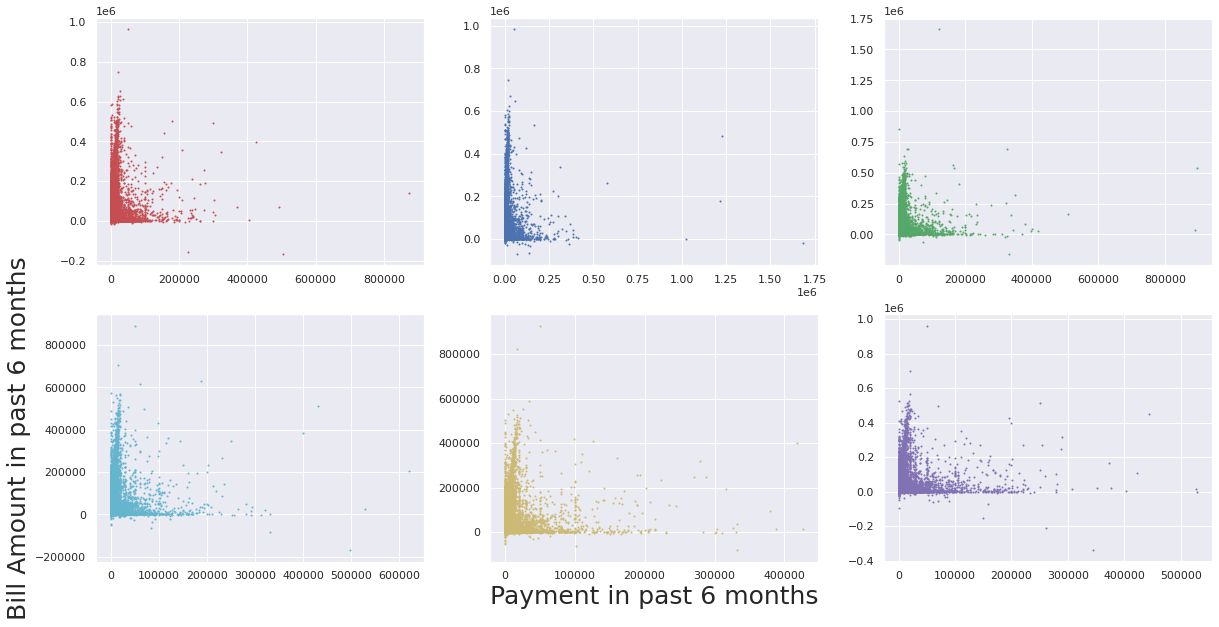

In [ ]:
plt.subplots(figsize = (20,10))

plt.subplot(231)
plt.scatter(x=df['PAY_AMT1'], y=df['BILL_AMT1'], c='r', s=1)

plt.subplot(232)
plt.scatter(x=df['PAY_AMT2'], y=df['BILL_AMT2'], c='b', s=1)

plt.subplot(233)
plt.scatter(x=df['PAY_AMT3'], y=df['BILL_AMT3'], c='g', s=1)

plt.subplot(234)
plt.scatter(x=df['PAY_AMT4'], y=df['BILL_AMT4'], c='c', s=1)
plt.ylabel("Bill Amount in past 6 months", fontsize=25)

plt.subplot(235)
plt.scatter(x=df['PAY_AMT5'], y=df['BILL_AMT5'], c='y', s=1)
plt.xlabel("Payment in past 6 months", fontsize=25)

plt.subplot(236)
plt.scatter(x=df['PAY_AMT6'], y=df['BILL_AMT6'], c='m', s=1)

plt.show()

There is higher proportion of clients for whom the bill amount is high but payment done against the same is very low.

In [ ]:
x1 = list(df[df['DEF_PAY_NMO'] == 1]['LIMIT_BAL'])
x2 = list(df[df['DEF_PAY_NMO'] == 0]['LIMIT_BAL'])

Text(0.5, 1.0, 'LIMIT BALANCE HISTOGRAM BY TYPE OF CREDIT CARD')

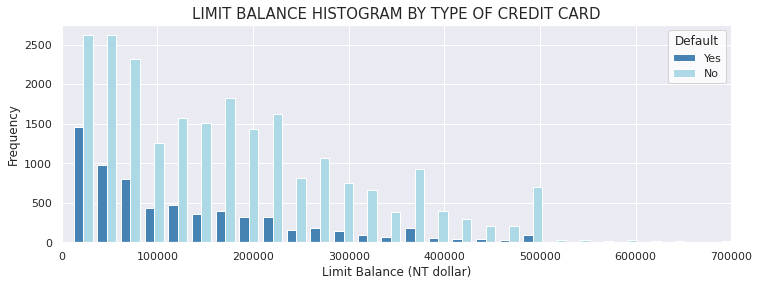

In [ ]:
plt.figure(figsize=(12,4))
plt.hist([x1, x2], bins = 40,  color=['steelblue', 'lightblue'])
plt.xlim([0,700000])
plt.legend(['Yes', 'No'], title = 'Default', loc='upper right', facecolor='white')
plt.xlabel('Limit Balance (NT dollar)')
plt.ylabel('Frequency')
plt.title('LIMIT BALANCE HISTOGRAM BY TYPE OF CREDIT CARD', SIZE=15)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
df['intercept'] = 1

# Compute and view VIF
vif = pd.DataFrame()
vif["variables"] = df.columns
vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

vif.sort_values(by='VIF', ascending=False)

,variables,VIF
24,intercept,64.646181
12,BILL_AMT2,25.866299
15,BILL_AMT5,24.998161
13,BILL_AMT3,21.775454
14,BILL_AMT4,20.346869
16,BILL_AMT6,15.025047
11,BILL_AMT1,14.046206
9,PAY_5,4.725313
8,PAY_4,4.287594
7,PAY_3,3.658921


In [ ]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEF_PAY_NMO,intercept
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,1
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,1
4,50000.0,2,2,1,37,0,0,0,0,0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,1
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,1


In [ ]:
features = df.columns[:23]

In [ ]:
features

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [ ]:
def Scale_Split_Balance(df, features, target='DEF_PAY_NMO', scaled=False, balanced=False, test_size=0.2, random_state=10):
    '''
    This function takes in a dataframe, the feature variables, the target variables
    and then splits the data with the user having the option to scale and balance the data
    and set values for the split proportion and the random seed.
    '''
    # Resampling methods
    random_os = RandomOverSampler() # oversampling
    smote = SMOTE() # smote
    adasyn = ADASYN() # Adaptive synthetic
    

    X, y = df[features], df[target]

    # Checking if X needs to be scaled
    if scaled == True:
        X_sc = pd.DataFrame(MinMaxScaler().fit_transform(X), columns=X.columns)
    else:
        X_sc = X
    
    # Executing sklearn's train-test split
    X_sc_train, X_sc_test, y_train, y_test = train_test_split(X_sc, y, test_size=test_size, stratify=y, random_state=random_state)
    
    # Checking if training data needs to be balanced
    if balanced == 'random_os':
        X_sc_train_rs, y_sc_train_rs = random_os.fit_resample(X_sc_train, y_train)
    elif balanced == 'smote':
        X_sc_train_rs, y_sc_train_rs = smote.fit_resample(X_sc_train, y_train)
    elif balanced == 'adasyn':
        X_sc_train_rs, y_sc_train_rs = adasyn.fit_resample(X_sc_train, y_train)
    else:
        X_sc_train_rs, y_sc_train_rs = X_sc_train, y_train        
        
    return X_sc_train_rs, X_sc_test, y_sc_train_rs, y_test



In [ ]:
pip install --pre pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 544 kB 15.0 MB/s 
     |████████████████████████████████| 1.8 MB 61.7 MB/s 
     |████████████████████████████████| 11.2 MB 58.2 MB/s 
     |████████████████████████████████| 62 kB 1.4 MB/s 
     |████████████████████████████████| 43 kB 1.7 MB/s 
     |████████████████████████████████| 106 kB 73.2 MB/s 
     |████████████████████████████████| 3.3 MB 53.3 MB/s 
     |████████████████████████████████| 2.0 MB 56.4 MB/s 
     |████████████████████████████████| 43 kB 2.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 281 kB 63.3 MB/s 
     |████████████████████████████████| 79.9 MB 119 kB/s 
     |████████████████████████████████| 6.7 MB 23.6 MB/s 
     |████████████████████████████████| 69 kB 7.6 MB/s 
     |██████████████████████

In [ ]:
from pycaret.classification import*

'cuml' is a soft dependency and not included in the pycaret installation. Please run: `pip install cuml` to install.
'cuml' is a soft dependency and not included in the pycaret installation. Please run: `pip install cuml` to install.
'cuml' is a soft dependency and not included in the pycaret installation. Please run: `pip install cuml` to install.
'cuml' is a soft dependency and not included in the pycaret installation. Please run: `pip install cuml` to install.


**Modeling**

In [ ]:
cfl01 = setup(data = df , target = "DEF_PAY_NMO",session_id = 123)

INFO:logs:PyCaret ClassificationExperiment
INFO:logs:Logging name: clf-default-name
INFO:logs:ML Usecase: MLUsecase.CLASSIFICATION
INFO:logs:version 3.0.0.rc3
INFO:logs:Initializing setup()
INFO:logs:self.USI: 2b46
INFO:logs:self.variable_keys: {'master_model_container', 'exp_id', 'memory', 'X_train', '_ml_usecase', '_all_models', 'variable_keys', 'data', 'y', '_is_multiclass', 'logging_param', 'html_param', 'pipeline', 'n_jobs_param', 'log_plots_param', 'seed', 'fold_groups_param', '_available_plots', '_gpu_n_jobs_param', 'exp_name_log', 'y_train', 'fix_imbalance', 'X', 'fold_generator', 'fold_shuffle_param', 'target_param', 'X_test', 'y_test', '_all_models_internal', 'idx', 'gpu_param', '_all_metrics', 'display_container', 'USI'}
INFO:logs:Checking environment
INFO:logs:python_version: 3.7.13
INFO:logs:python_build: ('default', 'Apr 24 2022 01:04:09')
INFO:logs:machine: x86_64
INFO:logs:platform: Linux-5.4.188+-x86_64-with-Ubuntu-18.04-bionic
INFO:logs:Memory: svmem(total=13617745920

,Description,Value
0,Session id,123
1,Target,DEF_PAY_NMO
2,Target type,Binary
3,Original data shape,"(30000, 25)"
4,Transformed data shape,"(30000, 24)"
5,Transformed train set shape,"(20999, 24)"
6,Transformed test set shape,"(9001, 24)"
7,Numeric features,24
8,Preprocess,True
9,Imputation type,simple


INFO:logs:Soft dependency imported: xgboost: 0.90
'catboost' is a soft dependency and not included in the pycaret installation. Please run: `pip install catboost` to install.
Alternately, you can install this by running `pip install pycaret[models]`
INFO:logs:Soft dependency imported: xgboost: 0.90
'catboost' is a soft dependency and not included in the pycaret installation. Please run: `pip install catboost` to install.
Alternately, you can install this by running `pip install pycaret[models]`
INFO:logs:setup() successfully completed in 1.69s...............


In [ ]:
best_model = compare_models()

INFO:logs:Initializing compare_models()
INFO:logs:compare_models(self=<pycaret.classification.oop.ClassificationExperiment object at 0x7fdcae1f0810>, include=None, fold=None, round=4, cross_validation=True, sort=Accuracy, n_select=1, budget_time=None, turbo=True, errors=ignore, fit_kwargs=None, groups=None, experiment_custom_tags=None, probability_threshold=None, verbose=True, parallel=None, caller_params={'self': <pycaret.classification.oop.ClassificationExperiment object at 0x7fdcae1f0810>, 'include': None, 'exclude': None, 'fold': None, 'round': 4, 'cross_validation': True, 'sort': 'Accuracy', 'n_select': 1, 'budget_time': None, 'turbo': True, 'errors': 'ignore', 'fit_kwargs': None, 'groups': None, 'experiment_custom_tags': None, 'probability_threshold': None, 'engines': None, 'verbose': True, 'parallel': None, '__class__': <class 'pycaret.classification.oop.ClassificationExperiment'>}, exclude=None)
INFO:logs:Checking exceptions
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8210,0.7793,0.3656,0.6769,0.4746,0.3781,0.4043,5.0820
lightgbm,Light Gradient Boosting Machine,0.8185,0.7772,0.3602,0.6658,0.4673,0.3694,0.3949,0.4890
ada,Ada Boost Classifier,0.8149,0.7706,0.3195,0.6718,0.4326,0.3384,0.3721,1.1660
rf,Random Forest Classifier,0.8145,0.7641,0.3662,0.6420,0.4662,0.3639,0.3851,3.7210
lda,Linear Discriminant Analysis,0.8104,0.7147,0.2519,0.6976,0.3701,0.2863,0.3382,0.1120
et,Extra Trees Classifier,0.8088,0.7521,0.3610,0.6156,0.4550,0.3485,0.3668,1.9480
ridge,Ridge Classifier,0.7978,0.0000,0.1406,0.7204,0.2349,0.1754,0.2551,0.0600
lr,Logistic Regression,0.7788,0.6450,0.0000,0.0000,0.0000,-0.0001,-0.0012,1.2050
dummy,Dummy Classifier,0.7788,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0560
knn,K Neighbors Classifier,0.7509,0.6015,0.1696,0.3652,0.2314,0.1060,0.1172,1.8440


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

INFO:logs:Initializing Logistic Regression
INFO:logs:Total runtime is 5.308389663696289e-05 minutes
INFO:logs:SubProcess create_model() called ==================================
INFO:logs:Initializing create_model()
INFO:logs:create_model(self=<pycaret.classification.oop.ClassificationExperiment object at 0x7fdcae1f0810>, estimator=lr, fold=StratifiedKFold(n_splits=10, random_state=None, shuffle=False), round=4, cross_validation=True, predict=True, fit_kwargs={}, groups=None, refit=False, probability_threshold=None, experiment_custom_tags=None, verbose=False, system=False, add_to_model_list=True, metrics=None, display=<pycaret.internal.display.display.CommonDisplay object at 0x7fdcae200b90>, model_only=True, return_train_score=False, kwargs={})
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:logs:Importing untrained model
INFO:logs:Logistic Regression Imported successfully


INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
INFO:logs:compare_models() successfully completed......................................


In [ ]:
X_train,X_test,y_train,y_test = Scale_Split_Balance(df,features,target='DEF_PAY_NMO',scaled=False,balanced=False)

**Logistic regression**

In [ ]:
clf_lr = LogisticRegression()

In [ ]:
X_train,X_test,y_train,y_test = Scale_Split_Balance(df,features,target='DEF_PAY_NMO',scaled=True,balanced='random_os')
clf_lr.fit(X_train,y_train)
predictions = clf_lr.predict(X_test)
scores = cross_val_score(clf_lr, X_train, y_train, scoring ="roc_auc", cv = 10)
scores = np.mean(scores)
print("ROC_AUC - ",scores)
print('\n')

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

ROC_AUC -  0.7182149364319301


[[3245 1428]
 [ 462  865]]
              precision    recall  f1-score   support

           0       0.88      0.69      0.77      4673
           1       0.38      0.65      0.48      1327

    accuracy                           0.69      6000
   macro avg       0.63      0.67      0.63      6000
weighted avg       0.77      0.69      0.71      6000



In [ ]:
X_train,X_test,y_train,y_test = Scale_Split_Balance(df,features,target='DEF_PAY_NMO',scaled=True,balanced='smote')
clf_lr.fit(X_train,y_train)
predictions = clf_lr.predict(X_test)
scores = cross_val_score(clf_lr, X_train, y_train, scoring ="roc_auc", cv = 10)
scores = np.mean(scores)
print("ROC_AUC - ",scores)
print('\n')

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

ROC_AUC -  0.7263021739283755


[[3201 1472]
 [ 461  866]]
              precision    recall  f1-score   support

           0       0.87      0.68      0.77      4673
           1       0.37      0.65      0.47      1327

    accuracy                           0.68      6000
   macro avg       0.62      0.67      0.62      6000
weighted avg       0.76      0.68      0.70      6000



In [ ]:
X_train,X_test,y_train,y_test = Scale_Split_Balance(df,features,target='DEF_PAY_NMO',scaled=True,balanced='adasyn')
clf_lr.fit(X_train,y_train)
predictions = clf_lr.predict(X_test)
scores = cross_val_score(clf_lr, X_train, y_train, scoring ="roc_auc", cv = 10)
scores = np.mean(scores)
print("ROC_AUC - ",scores)
print('\n')

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

ROC_AUC -  0.6789763134618816


[[2935 1738]
 [ 403  924]]
              precision    recall  f1-score   support

           0       0.88      0.63      0.73      4673
           1       0.35      0.70      0.46      1327

    accuracy                           0.64      6000
   macro avg       0.61      0.66      0.60      6000
weighted avg       0.76      0.64      0.67      6000



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

In [ ]:
logistic = LogisticRegression(solver='saga', tol=1e-2, max_iter=200,random_state=42)

In [ ]:
distributions = dict(C=uniform(loc=0, scale=4), penalty=['l2', 'l1'])

In [ ]:
clf = RandomizedSearchCV(logistic, distributions, random_state=42)

In [ ]:
type(clf)

sklearn.model_selection._search.RandomizedSearchCV

In [ ]:
lr_best= clf.fit(X_train, y_train) 

In [ ]:
type(lr_best)

sklearn.model_selection._search.RandomizedSearchCV

In [ ]:
X_train,X_test,y_train,y_test = Scale_Split_Balance(df,features,target='DEF_PAY_NMO',scaled=True,balanced="random_os")
lr_best.fit(X_train,y_train)
predictions = lr_best.predict(X_test)
scores = cross_val_score(lr_best, X_train, y_train, scoring ="roc_auc", cv = 10)
scores = np.mean(scores)
print("ROC_AUC - ",scores)
print('\n')

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

ROC_AUC -  0.7016172091481422


[[3981  692]
 [ 635  692]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.86      4673
           1       0.50      0.52      0.51      1327

    accuracy                           0.78      6000
   macro avg       0.68      0.69      0.68      6000
weighted avg       0.78      0.78      0.78      6000



In [ ]:
X_train,X_test,y_train,y_test = Scale_Split_Balance(df,features,target='DEF_PAY_NMO',scaled=True,balanced="smote")
lr_best.fit(X_train,y_train)
predictions = lr_best.predict(X_test)
scores = cross_val_score(lr_best, X_train, y_train, scoring ="roc_auc", cv = 10)
scores = np.mean(scores)
print("ROC_AUC - ",scores)
print('\n')

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

ROC_AUC -  0.7057403162494564


[[3981  692]
 [ 635  692]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.86      4673
           1       0.50      0.52      0.51      1327

    accuracy                           0.78      6000
   macro avg       0.68      0.69      0.68      6000
weighted avg       0.78      0.78      0.78      6000



In [ ]:
X_train,X_test,y_train,y_test = Scale_Split_Balance(df,features,target='DEF_PAY_NMO',scaled=True,balanced="adasyn")
lr_best.fit(X_train,y_train)
predictions = lr_best.predict(X_test)
scores = cross_val_score(lr_best, X_train, y_train, scoring ="roc_auc", cv = 10)
scores = np.mean(scores)
print("ROC_AUC - ",scores)
print('\n')

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

ROC_AUC -  0.6543409833682043


[[3981  692]
 [ 635  692]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.86      4673
           1       0.50      0.52      0.51      1327

    accuracy                           0.78      6000
   macro avg       0.68      0.69      0.68      6000
weighted avg       0.78      0.78      0.78      6000



# Random Forest

In [ ]:
clf_rf = RandomForestClassifier()

In [ ]:
X_train,X_test,y_train,y_test = Scale_Split_Balance(df,features,target='DEF_PAY_NMO',scaled=False,balanced="random_os")
clf_rf.fit(X_train,y_train)
predictions = clf_rf.predict(X_test)
scores = cross_val_score(clf_rf, X_train, y_train, scoring ="roc_auc", cv = 10)
scores = np.mean(scores)
print("ROC_AUC - ",scores)
print('\n')

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

ROC_AUC -  0.990241010858824


[[4259  414]
 [ 752  575]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      4673
           1       0.58      0.43      0.50      1327

    accuracy                           0.81      6000
   macro avg       0.72      0.67      0.69      6000
weighted avg       0.79      0.81      0.79      6000



In [ ]:
X_train,X_test,y_train,y_test = Scale_Split_Balance(df,features,target='DEF_PAY_NMO',scaled=False,balanced="smote")
clf_rf.fit(X_train,y_train)
predictions = clf_rf.predict(X_test)
scores = cross_val_score(clf_rf, X_train, y_train, scoring ="roc_auc", cv = 10)
scores = np.mean(scores)
print("ROC_AUC - ",scores)
print('\n')

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

ROC_AUC -  0.9218978086389361


[[4006  667]
 [ 676  651]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      4673
           1       0.49      0.49      0.49      1327

    accuracy                           0.78      6000
   macro avg       0.67      0.67      0.67      6000
weighted avg       0.78      0.78      0.78      6000



In [ ]:
X_train,X_test,y_train,y_test = Scale_Split_Balance(df,features,target='DEF_PAY_NMO',scaled=False,balanced='adasyn')
clf_rf.fit(X_train,y_train)
predictions = clf_rf.predict(X_test)
scores = cross_val_score(clf_rf, X_train, y_train, scoring ="roc_auc", cv = 10)
scores = np.mean(scores)
print("ROC_AUC - ",scores)
print('\n')

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

ROC_AUC -  0.9116768108243848


[[3988  685]
 [ 671  656]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      4673
           1       0.49      0.49      0.49      1327

    accuracy                           0.77      6000
   macro avg       0.67      0.67      0.67      6000
weighted avg       0.77      0.77      0.77      6000



## tuning random forest

In [ ]:
param_grid = {
    'max_depth': [50,60,110],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12,14,16],
    'n_estimators': [100, 200,300]
}

grid_search = GridSearchCV(estimator = clf_rf, param_grid = param_grid,cv = 3, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 135 candidates, totalling 405 fits


KeyboardInterrupt: ignored

In [ ]:
best_params_ = {'max_depth': 90,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 200}

In [ ]:
rf_best = RandomForestClassifier(**best_params_)

In [ ]:
X_train,X_test,y_train,y_test = Scale_Split_Balance(df,features,target='DEF_PAY_NMO',scaled=False,balanced="smote")
rf_best.fit(X_train,y_train)
predictions = rf_best.predict(X_test)
scores = cross_val_score(rf_best, X_train, y_train, scoring ="roc_auc", cv = 10)
scores = np.mean(scores)
print("ROC_AUC - ",scores)
print('\n')

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

ROC_AUC -  0.9124104948892903


[[3991  682]
 [ 640  687]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.86      4673
           1       0.50      0.52      0.51      1327

    accuracy                           0.78      6000
   macro avg       0.68      0.69      0.68      6000
weighted avg       0.78      0.78      0.78      6000



In [ ]:
X_train,X_test,y_train,y_test = Scale_Split_Balance(df,features,target='DEF_PAY_NMO',scaled=False,balanced="random_os")
rf_best.fit(X_train,y_train)
predictions = rf_best.predict(X_test)
predictions_train = rf_best.predict(X_train)
scores = cross_val_score(rf_best, X_train, y_train, scoring ="roc_auc", cv = 10)
scores = np.mean(scores)
print("ROC_AUC - ",scores)
print('\n')
print(classification_report(y_train,predictions_train))
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

ROC_AUC -  0.9682899186844554


              precision    recall  f1-score   support

           0       0.99      0.96      0.98     18691
           1       0.96      0.99      0.98     18691

    accuracy                           0.98     37382
   macro avg       0.98      0.98      0.98     37382
weighted avg       0.98      0.98      0.98     37382

[[4120  553]
 [ 644  683]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      4673
           1       0.55      0.51      0.53      1327

    accuracy                           0.80      6000
   macro avg       0.71      0.70      0.70      6000
weighted avg       0.80      0.80      0.80      6000



In [ ]:
X_train,X_test,y_train,y_test = Scale_Split_Balance(df,features,target='DEF_PAY_NMO',scaled=False,balanced="adasyn")
rf_best.fit(X_train,y_train)
predictions = rf_best.predict(X_test)
scores = cross_val_score(rf_best, X_train, y_train, scoring ="roc_auc", cv = 10)
scores = np.mean(scores)
print("ROC_AUC - ",scores)
print('\n')

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

ROC_AUC -  0.9004637530820073


[[3914  759]
 [ 632  695]]
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      4673
           1       0.48      0.52      0.50      1327

    accuracy                           0.77      6000
   macro avg       0.67      0.68      0.67      6000
weighted avg       0.78      0.77      0.77      6000



In [ ]:
import pickle

In [ ]:
# Saving the model to disk
pickle.dump(rf_best, open('model.pkl', 'wb'))

## Xgboost

In [ ]:
clf_xgb = XGBClassifier()

In [ ]:
X_train,X_test,y_train,y_test = Scale_Split_Balance(df,features,target='DEF_PAY_NMO',scaled=True,balanced='smote')
clf_xgb.fit(X_train,y_train)
predictions = clf_xgb.predict(X_test)
scores = cross_val_score(clf_xgb, X_train, y_train, scoring ="roc_auc", cv = 10)
scores = np.mean(scores)
print("ROC_AUC - ",scores)
print('\n')

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

ROC_AUC -  0.8709516207886405


[[4163  510]
 [ 677  650]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.88      4673
           1       0.56      0.49      0.52      1327

    accuracy                           0.80      6000
   macro avg       0.71      0.69      0.70      6000
weighted avg       0.79      0.80      0.80      6000



In [ ]:
X_train,X_test,y_train,y_test = Scale_Split_Balance(df,features,target='DEF_PAY_NMO',scaled=False,balanced="random_os")
clf_xgb.fit(X_train,y_train)
predictions = clf_xgb.predict(X_test)
scores = cross_val_score(clf_xgb, X_train, y_train, scoring ="roc_auc", cv = 10)
scores = np.mean(scores)
print("ROC_AUC - ",scores)
print('\n')

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

ROC_AUC -  0.8017486301005272


[[3756  917]
 [ 501  826]]
              precision    recall  f1-score   support

           0       0.88      0.80      0.84      4673
           1       0.47      0.62      0.54      1327

    accuracy                           0.76      6000
   macro avg       0.68      0.71      0.69      6000
weighted avg       0.79      0.76      0.77      6000



In [ ]:
X_train,X_test,y_train,y_test = Scale_Split_Balance(df,features,target='DEF_PAY_NMO',scaled=False,balanced="adasyn")
clf_xgb.fit(X_train,y_train)
predictions = clf_xgb.predict(X_test)
scores = cross_val_score(clf_xgb, X_train, y_train, scoring ="roc_auc", cv = 10)
scores = np.mean(scores)
print("ROC_AUC - ",scores)
print('\n')

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

ROC_AUC -  0.8507431744829675


[[3765  908]
 [ 598  729]]
              precision    recall  f1-score   support

           0       0.86      0.81      0.83      4673
           1       0.45      0.55      0.49      1327

    accuracy                           0.75      6000
   macro avg       0.65      0.68      0.66      6000
weighted avg       0.77      0.75      0.76      6000



In [ ]:
X_train,X_test,y_train,y_test = Scale_Split_Balance(df,features,target='DEF_PAY_NMO',scaled=False,balanced=False)
clf_xgb.fit(X_train,y_train)
predictions = clf_xgb.predict(X_test)
scores = cross_val_score(clf_xgb, X_train, y_train, scoring ="roc_auc", cv = 10)
scores = np.mean(scores)
print("ROC_AUC - ",scores)
print('\n')

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

ROC_AUC -  0.7814970089964132


[[4425  248]
 [ 838  489]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.66      0.37      0.47      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000



### tunnig xgb

In [ ]:
params = { 'gamma':0,
    'learning_rate':0.01, 
    'max_depth':3, 
    'colsample_bytree':0.6,
    'subsample':0.8,
    'scale_pos_weight':3.5,
    'n_estimators':1000,
    'objective':'binary:logistic', 
    'reg_alpha':0.3    
}


In [ ]:
# Instantiate model
clf_xgb = XGBClassifier(**params)

In [ ]:
# Use model's initial parameters to get cross validation score
scores = cross_val_score(clf_xgb, X_train, y_train, scoring ="roc_auc", cv = 10)
roc_auc_xgb = np.mean(scores)

In [ ]:
print(f'ROC_AUC training score with initial best parameters for XGBoost: {roc_auc_xgb:.3f}')

ROC_AUC training score with initial best parameters for XGBoost: 0.783


In [ ]:
# Number of trees
n_estimators = np.arange(200,1000,200)

# Minimum loss reduction required to make a further partition on a leaf node of the tree
# The larger gamma is, the more conservative the algorithm will be
gamma = np.arange(0.1,0.6,0.1)

# Default 0.3, range(0,1)
learning_rate = np.arange(0.1,0.6,0.1)

# Maximum number of levels in tree
max_depth = list(range(3,8,1))

# Subsample ratio of the training instances.Range(0,1)
subsample = np.arange(0.5,0.9,0.1)

# Subsample ratio of columns when constructing each tree. Range(0,1)
colsample_bytree = np.arange(0.5,0.9,0.1)

# Control the balance of positive and negative weights
# Sum(negative instances) / sum(positive instances)
scale_pos_weight = [1,3.5]


# Create the random grid
random_grid_xgb = {'n_estimators': n_estimators,
                   'gamma': gamma,
                   'learning_rate':learning_rate,
                   'max_depth': max_depth,
                   'subsample':subsample,
                   'colsample_bytree':colsample_bytree,
                   'scale_pos_weight':scale_pos_weight
                  }
print(random_grid_xgb)

{'n_estimators': array([200, 400, 600, 800]), 'gamma': array([0.1, 0.2, 0.3, 0.4, 0.5]), 'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5]), 'max_depth': [3, 4, 5, 6, 7], 'subsample': array([0.5, 0.6, 0.7, 0.8]), 'colsample_bytree': array([0.5, 0.6, 0.7, 0.8]), 'scale_pos_weight': [1, 3.5]}


In [ ]:
# Use randomized search to find best parameters

xgboost = XGBClassifier()
xgb_random = RandomizedSearchCV(estimator = xgboost, 
                                param_distributions = random_grid_xgb, 
                                n_iter = 100, 
                                cv = 3, 
                                verbose=1, 
                                random_state=42, 
                                n_jobs = -1,
                                scoring ='roc_auc')


xgb_random.fit(X_train, y_train)   
xgb_random.best_params_, xgb_random.best_score_

print(xgb_random.best_params_,xgb_random.best_score_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
{'subsample': 0.6, 'scale_pos_weight': 1, 'n_estimators': 200, 'max_depth': 4, 'learning_rate': 0.1, 'gamma': 0.4, 'colsample_bytree': 0.5} 0.7776264615334144


In [ ]:
xgb_random.best_params_

{'subsample': 0.6,
 'scale_pos_weight': 1,
 'n_estimators': 200,
 'max_depth': 4,
 'learning_rate': 0.1,
 'gamma': 0.4,
 'colsample_bytree': 0.5}

In [ ]:
xgb_best = XGBClassifier(**xgb_random.best_params_)

In [ ]:
X_train,X_test,y_train,y_test = Scale_Split_Balance(df,features,target='DEF_PAY_NMO',scaled=False,balanced=False)
xgb_best.fit(X_train,y_train)
predictions = xgb_best.predict(X_test)
scores = cross_val_score(xgb_best, X_train, y_train, scoring ="roc_auc", cv = 10)
scores = np.mean(scores)
print("ROC_AUC - ",scores)
print('\n')

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

ROC_AUC -  0.7803211175336412


[[4412  261]
 [ 817  510]]
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4673
           1       0.66      0.38      0.49      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.66      0.69      6000
weighted avg       0.80      0.82      0.80      6000



In [ ]:
X_train,X_test,y_train,y_test = Scale_Split_Balance(df,features,target='DEF_PAY_NMO',scaled=False,balanced='random_os')
xgb_best.fit(X_train,y_train)
predictions = xgb_best.predict(X_test)
scores = cross_val_score(xgb_best, X_train, y_train, scoring ="roc_auc", cv = 10)
scores = np.mean(scores)
print("ROC_AUC - ",scores)
print('\n')

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

ROC_AUC -  0.8334009176620191


[[3729  944]
 [ 500  827]]
              precision    recall  f1-score   support

           0       0.88      0.80      0.84      4673
           1       0.47      0.62      0.53      1327

    accuracy                           0.76      6000
   macro avg       0.67      0.71      0.69      6000
weighted avg       0.79      0.76      0.77      6000



In [ ]:
X_train,X_test,y_train,y_test = Scale_Split_Balance(df,features,target='DEF_PAY_NMO',scaled=False,balanced='smote')
xgb_best.fit(X_train,y_train)
predictions = xgb_best.predict(X_test)
scores = cross_val_score(xgb_best, X_train, y_train, scoring ="roc_auc", cv = 10)
scores = np.mean(scores)
print("ROC_AUC - ",scores)
print('\n')

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

ROC_AUC -  0.8833491591768177


[[3895  778]
 [ 642  685]]
              precision    recall  f1-score   support

           0       0.86      0.83      0.85      4673
           1       0.47      0.52      0.49      1327

    accuracy                           0.76      6000
   macro avg       0.66      0.67      0.67      6000
weighted avg       0.77      0.76      0.77      6000



In [ ]:
X_train,X_test,y_train,y_test = Scale_Split_Balance(df,features,target='DEF_PAY_NMO',scaled=False,balanced='adasyn')
xgb_best.fit(X_train,y_train)
predictions = xgb_best.predict(X_test)
scores = cross_val_score(xgb_best, X_train, y_train, scoring ="roc_auc", cv = 10)
scores = np.mean(scores)
print("ROC_AUC - ",scores)
print('\n')

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

ROC_AUC -  0.8776533703794875


[[3876  797]
 [ 644  683]]
              precision    recall  f1-score   support

           0       0.86      0.83      0.84      4673
           1       0.46      0.51      0.49      1327

    accuracy                           0.76      6000
   macro avg       0.66      0.67      0.66      6000
weighted avg       0.77      0.76      0.76      6000



# adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
clf_ada = AdaBoostClassifier()

In [ ]:
X_train,X_test,y_train,y_test = Scale_Split_Balance(df,features,target='DEF_PAY_NMO',scaled=False,balanced='smote')
clf_ada.fit(X_train,y_train)
predictions = clf_ada.predict(X_test)
scores = cross_val_score(clf_ada, X_train, y_train, scoring ="roc_auc", cv = 10)
scores = np.mean(scores)
print("ROC_AUC - ",scores)
print('\n')

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
#plot_confusion_matrix(xgb_best,X_test,y_test)

ROC_AUC -  0.8248719136459257


[[3625 1048]
 [ 569  758]]
              precision    recall  f1-score   support

           0       0.86      0.78      0.82      4673
           1       0.42      0.57      0.48      1327

    accuracy                           0.73      6000
   macro avg       0.64      0.67      0.65      6000
weighted avg       0.77      0.73      0.74      6000



In [ ]:
X_train,X_test,y_train,y_test = Scale_Split_Balance(df,features,target='DEF_PAY_NMO',scaled=False,balanced='random_os')
clf_ada.fit(X_train,y_train)
predictions = clf_ada.predict(X_test)
scores = cross_val_score(clf_ada, X_train, y_train, scoring ="roc_auc", cv = 10)
scores = np.mean(scores)
print("ROC_AUC - ",scores)
print('\n')

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
#plot_confusion_matrix(xgb_best,X_test,y_test)

ROC_AUC -  0.7833775769281748


[[3757  916]
 [ 531  796]]
              precision    recall  f1-score   support

           0       0.88      0.80      0.84      4673
           1       0.46      0.60      0.52      1327

    accuracy                           0.76      6000
   macro avg       0.67      0.70      0.68      6000
weighted avg       0.79      0.76      0.77      6000



In [ ]:
X_train,X_test,y_train,y_test = Scale_Split_Balance(df,features,target='DEF_PAY_NMO',scaled=False,balanced='adasyn')
clf_ada.fit(X_train,y_train)
predictions = clf_ada.predict(X_test)
scores = cross_val_score(clf_ada, X_train, y_train, scoring ="roc_auc", cv = 10)
scores = np.mean(scores)
print("ROC_AUC - ",scores)
print('\n')

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
#plot_confusion_matrix(xgb_best,X_test,y_test)

ROC_AUC -  0.8183170681669338


[[3548 1125]
 [ 584  743]]
              precision    recall  f1-score   support

           0       0.86      0.76      0.81      4673
           1       0.40      0.56      0.47      1327

    accuracy                           0.72      6000
   macro avg       0.63      0.66      0.64      6000
weighted avg       0.76      0.72      0.73      6000



In [ ]:
para_grid = {'n_estimators': [100,200],'learning_rate':[0.001,0.01,0.1,0.2,0.5]}

In [ ]:
ada_best = GridSearchCV(AdaBoostClassifier(),param_grid=para_grid)
ada_best.fit(X_train, y_train)
ada_best.best_estimator_
ada_best.score

<bound method BaseSearchCV.score of GridSearchCV(cv=None, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             n_jobs=None,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.5],
                         'n_estimators': [100, 200]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)>

In [ ]:
ada_best.best_params_

{'learning_rate': 0.5, 'n_estimators': 200}

In [ ]:
adaa_best = AdaBoostClassifier(**ada_best.best_params_)

In [ ]:
X_train,X_test,y_train,y_test = Scale_Split_Balance(df,features,target='DEF_PAY_NMO',scaled=False,balanced='random_os')
adaa_best.fit(X_train,y_train)
predictions = adaa_best.predict(X_test)
scores = cross_val_score(adaa_best, X_train, y_train, scoring ="roc_auc", cv =10 )
scores = np.mean(scores)
print("ROC_AUC - ",scores)
print('\n')

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
#plot_confusion_matrix(xgb_best,X_test,y_test)

ROC_AUC -  0.7899004116457615


[[3764  909]
 [ 517  810]]
              precision    recall  f1-score   support

           0       0.88      0.81      0.84      4673
           1       0.47      0.61      0.53      1327

    accuracy                           0.76      6000
   macro avg       0.68      0.71      0.69      6000
weighted avg       0.79      0.76      0.77      6000



In [ ]:
X_train,X_test,y_train,y_test = Scale_Split_Balance(df,features,target='DEF_PAY_NMO',scaled=False,balanced='adasyn')
adaa_best.fit(X_train,y_train)
predictions = adaa_best.predict(X_test)
scores = cross_val_score(adaa_best, X_train, y_train, scoring ="roc_auc", cv = 10)
scores = np.mean(scores)
print("ROC_AUC - ",scores)
print('\n')

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
#plot_confusion_matrix(xgb_best,X_test,y_test)

ROC_AUC -  0.8271110232698808


[[3631 1042]
 [ 582  745]]
              precision    recall  f1-score   support

           0       0.86      0.78      0.82      4673
           1       0.42      0.56      0.48      1327

    accuracy                           0.73      6000
   macro avg       0.64      0.67      0.65      6000
weighted avg       0.76      0.73      0.74      6000



In [ ]:
X_train,X_test,y_train,y_test = Scale_Split_Balance(df,features,target='DEF_PAY_NMO',scaled=False,balanced='smote')
adaa_best.fit(X_train,y_train)
predictions = adaa_best.predict(X_test)
scores = cross_val_score(adaa_best, X_train, y_train, scoring ="roc_auc", cv = 10)
scores = np.mean(scores)
print("ROC_AUC - ",scores)
print('\n')

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
#plot_confusion_matrix(xgb_best,X_test,y_test)

ROC_AUC -  0.8360289524447347


[[3726  947]
 [ 585  742]]
              precision    recall  f1-score   support

           0       0.86      0.80      0.83      4673
           1       0.44      0.56      0.49      1327

    accuracy                           0.74      6000
   macro avg       0.65      0.68      0.66      6000
weighted avg       0.77      0.74      0.75      6000



In [ ]:
X_train,X_test,y_train,y_test = Scale_Split_Balance(df,features,target='DEF_PAY_NMO',scaled=False,balanced=False)

Text(0.5, 1.0, 'AdaBoost')

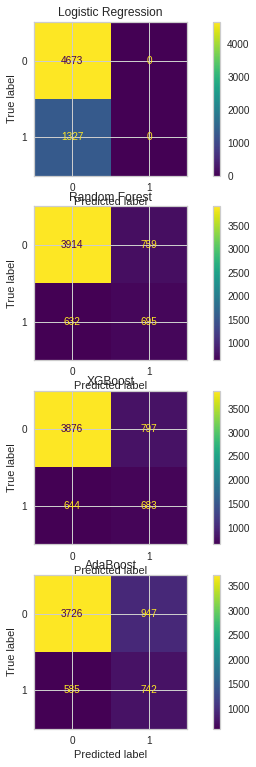

In [ ]:
# Plot confusion matrix of 4 models

fig,ax=plt.subplots(4,1, figsize=(9,13))

plot_confusion_matrix(lr_best, X_test, y_test, ax = ax[0], values_format="d")
ax[0].set_title("Logistic Regression")



plot_confusion_matrix(rf_best, X_test, y_test, ax = ax[1], values_format="d")
ax[1].set_title("Random Forest")


plot_confusion_matrix(xgb_best, X_test, y_test, ax = ax[2], values_format="d")
ax[2].set_title("XGBoost")


plot_confusion_matrix(adaa_best, X_test, y_test, ax = ax[3], values_format="d")
ax[3].set_title("AdaBoost")


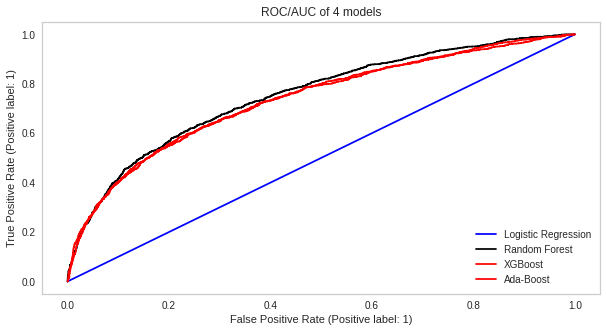

In [ ]:
# Plot ROC_AUC curve of 4 models
 
fig,ax=plt.subplots(figsize=(10,5))

plot_roc_curve(lr_best, X_test, y_test,ax=ax, color="blue",label='Logistic Regression')
plot_roc_curve(rf_best, X_test, y_test,ax=ax, color="black",label='Random Forest')
plot_roc_curve(xgb_best, X_test, y_test,ax=ax, color="red",label='XGBoost')
plot_roc_curve(adaa_best, X_test, y_test,ax=ax, color="red",label='Ada-Boost')
plt.title('ROC/AUC of 4 models')
plt.grid()

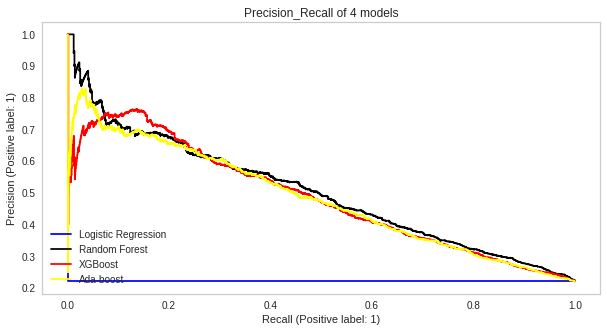

In [ ]:
# Compare 4 models' Precision_recall curves

fig,ax=plt.subplots(figsize=(10,5))

plot_precision_recall_curve(lr_best, X_test, y_test, ax=ax,color="blue",label='Logistic Regression')
plot_precision_recall_curve(rf_best, X_test, y_test, ax=ax,color="black",label='Random Forest')
plot_precision_recall_curve(xgb_best, X_test, y_test, ax=ax,color="red",label='XGBoost')
plot_precision_recall_curve(adaa_best, X_test, y_test, ax=ax,color="yellow",label='Ada-boost')
plt.title('Precision_Recall of 4 models')
plt.grid()

Text(0.5, 1.0, 'Features importance')

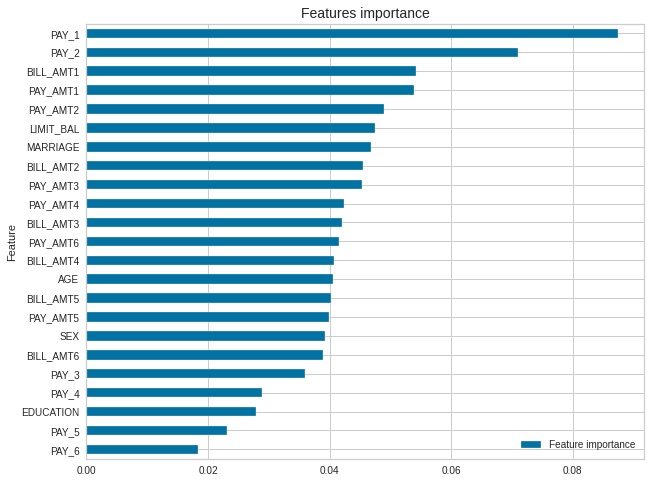

In [ ]:
# Plot feature importance of winner model - Random Forest

fea_df = pd.DataFrame({'Feature': features, 'Feature importance': rf_best.feature_importances_})
fea_df = fea_df.sort_values(by='Feature importance')

figure, ax = plt.subplots(figsize = (10,8))
fea_df.plot.barh(x='Feature',y='Feature importance', ax=ax)
plt.title('Features importance',fontsize=14)

Text(0.5, 1.0, 'Features importance')

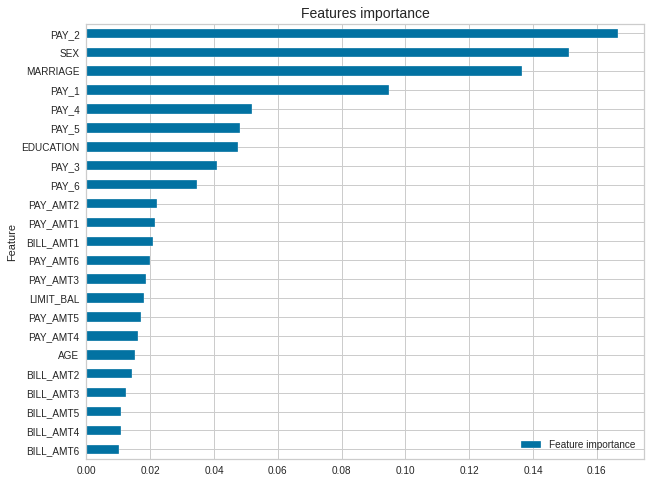

In [ ]:
# Plot feature importance of winner model - Random Forest

fea_df = pd.DataFrame({'Feature': features, 'Feature importance': xgb_best.feature_importances_})
fea_df = fea_df.sort_values(by='Feature importance')

figure, ax = plt.subplots(figsize = (10,8))
fea_df.plot.barh(x='Feature',y='Feature importance', ax=ax)
plt.title('Features importance',fontsize=14)

In [ ]:
X_train,X_test,y_train,y_test = Scale_Split_Balance(df,features,target='DEF_PAY_NMO',scaled=True,balanced='random_os')

In [ ]:
# checking the version of tensorflow
import tensorflow as tf

In [ ]:
from keras.models import Sequential

In [ ]:
from keras.layers import InputLayer, Dense 

In [ ]:
X_train.shape

(37382, 23)

In [ ]:
y_train.shape

(37382,)

In [ ]:
input_neurons = X_train.shape[1]


In [ ]:
output_neurons = 1

In [ ]:
number_of_hidden_layers = 4
neuron_hidden_layer_1 = 18
neuron_hidden_layer_2 = 15
neuron_hidden_layer_3 = 10
neuron_hidden_layer_4 = 8

In [ ]:
# defining the architecture of the model
model = Sequential()
model.add(InputLayer(input_shape=(input_neurons,)))
model.add(Dense(units=neuron_hidden_layer_1, activation='relu'))
model.add(Dense(units=neuron_hidden_layer_2, activation='relu'))
model.add(Dense(units=neuron_hidden_layer_3, activation='relu'))
model.add(Dense(units=neuron_hidden_layer_4, activation='relu'))
model.add(Dense(units=output_neurons, activation='sigmoid'))

In [ ]:
# summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 18)                432       
                                                                 
 dense_1 (Dense)             (None, 15)                285       
                                                                 
 dense_2 (Dense)             (None, 10)                160       
                                                                 
 dense_3 (Dense)             (None, 8)                 88        
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 974
Trainable params: 974
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])



In [ ]:
model.compile(metrics=[tf.keras.metrics.AUC(), tf.keras.metrics.Precision(), tf.keras.metrics.Recall()],
              loss='binary_crossentropy',
              optimizer='Adam')

In [ ]:
es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30)
model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test),callbacks = es, epochs=100)

Epoch 1/100
1169/1169 [==============================] - 13s 5ms/step - loss: 0.6115 - auc: 0.7110 - precision: 0.7430 - recall: 0.5217 - val_loss: 0.5796 - val_auc: 0.7445 - val_precision: 0.4705 - val_recall: 0.5411
Epoch 2/100
1169/1169 [==============================] - 5s 5ms/step - loss: 0.5856 - auc: 0.7420 - precision: 0.7709 - recall: 0.5549 - val_loss: 0.5833 - val_auc: 0.7529 - val_precision: 0.4709 - val_recall: 0.5674
Epoch 3/100
1169/1169 [==============================] - 5s 5ms/step - loss: 0.5795 - auc: 0.7514 - precision: 0.7711 - recall: 0.5683 - val_loss: 0.6030 - val_auc: 0.7610 - val_precision: 0.4357 - val_recall: 0.6255
Epoch 4/100
1169/1169 [==============================] - 6s 5ms/step - loss: 0.5733 - auc: 0.7622 - precision: 0.7634 - recall: 0.5921 - val_loss: 0.5490 - val_auc: 0.7689 - val_precision: 0.5091 - val_recall: 0.5690
Epoch 5/100
1169/1169 [==============================] - 5s 5ms/step - loss: 0.5674 - auc: 0.7699 - precision: 0.7658 - recall: 0.6

In [ ]:
prediction = model.predict(X_test)

In [ ]:
X_train,X_test,y_train,y_test = Scale_Split_Balance(df,features,target='DEF_PAY_NMO',scaled=False,balanced='adasyn')
adaa_best.fit(X_train,y_train)
predictions = adaa_best.predict(X_test)
scores = cross_val_score(adaa_best, X_train, y_train, scoring ="roc_auc", cv = 10)
scores = np.mean(scores)
print("ROC_AUC - ",scores)
print('\n')

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
#plot_confusion_matrix(xgb_best,X_test,y_test)

In [ ]:
confusion_matrix(y_test,prediction.round())

array([[3277, 1396],
       [ 410,  917]])

In [ ]:
print(classification_report(y_test,prediction.round()))

              precision    recall  f1-score   support

           0       0.89      0.70      0.78      4673
           1       0.40      0.69      0.50      1327

    accuracy                           0.70      6000
   macro avg       0.64      0.70      0.64      6000
weighted avg       0.78      0.70      0.72      6000



For example, for our dataset, we can consider that achieving a high recall is more important than getting a high precision – we would like to detect as many heart patients as possible. For some other models, like classifying whether a bank customer is a loan defaulter or not, it is desirable to have a high precision since the bank wouldn’t want to lose customers who were denied a loan based on the model’s prediction that they would be defaulters.